<a href="https://colab.research.google.com/github/luccidomingues/US-Fatal-Police-Shootings/blob/master/Publi_Fatal_Police_Shootings_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  pip install plotly
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

# import plotly.offline as py
# import plotly.graph_objs as go
# py.init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Black Americans are disproportionately killed by police.

Although half of the people shot and killed by police are white, black Americans are shot at a disproportionate rate. They account for just 13 percent of the U.S. population, but almost a quarter of police shooting victims. The disparity is even more pronounced among unarmed victims, of whom more than a third are black.

In [ ]:
Fatal_police = pd.read_csv('fatal-police-shootings-data.csv',sep=',')
Fatal_police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
Fatal_police.shape

(5573, 14)

In [ ]:
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                       598
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [ ]:
Fatal_police.update(Fatal_police['race'].fillna('Not Informed'))
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [ ]:
states_names = {'AK':'Alaska',
         'AL':'Alabama',
         'AR':'Arkansas','AZ':'Arizona',
         'CA':'California','CO':'Colorado',
         'CT':'Connecticut',
         'DC':'DC',
         'DE':'Delaware',
         'FL':'Florida',
         'GA':'Georgia',
         'HI':'Hawaii',
         'IA':'Iowa',
         'ID':'Idaho',
         'IL':'Illinois',
         'IN':'Indiana',
         'KS':'Kansas',
         'KY':'Kentucky',
         'LA':'Louisiana',
         'MA':'Massachusetts',
         'MD':'Maryland',
         'ME':'Maine',
         'MI':'Michigan',
         'MN':'Minnesota',
         'MO':'Missouri',
         'MS':'Mississippi',
         'MT':'Montana',
         'NC':'North Carolina',
         'ND':'North Dakota',
         'NE':'Nebraska',
         'NH':'New Hampshire',
         'NJ':'New Jersey',
         'NM':'New Mexico',
         'NV':'Nevada',
         'NY':'New York',
         'OH':'Ohio',
         'OK':'Oklahoma',
         'OR':'Oregon',
         'PA':'Pennsylvania',
         'RI':'Rhode Island',
         'SC':'South Carolina',
         'SD':'South Dakota',
         'TN':'Tennessee',
         'TX':'Texas',
         'UT':'Utah',
         'VA':'Virginia',
         'VT':'Vermont',
         'WA':'Washington',
         'WI':'Wisconsin',
         'WV':'West Virginia',
         'WY':'Wyoming'}


sex = {'M': 'Male', 'F': 'Female'}


race = {'A': 'Asian', 
       'B': 'Black', 
       'H': 'Hispanic', 
       'N': 'Native American', 
       'O': 'Other', 
       'W': 'White'}


In [ ]:
total_race_percent = round(Fatal_police['race'].value_counts(normalize=True) * 100,2)
total_race_percent.rename(index = race, inplace = True)

total_race_percent

White              45.27
Black              23.60
Hispanic           16.45
Not Informed       10.73
Asian               1.69
Native American     1.40
Other               0.86
Name: race, dtype: float64

In [ ]:
total_race_percent_df = pd.DataFrame(total_race_percent)
total_race_percent_df.reset_index(level=0, inplace=True)

total_race_percent_df.columns = ["race", "total_percent"] 

total_race_percent_df.head(10)

,race,total_percent
0,White,45.27
1,Black,23.60
2,Hispanic,16.45
3,Not Informed,10.73
4,Asian,1.69
5,Native American,1.40
6,Other,0.86


Below we can see that more than a third of the unarmed people killed by the police are black. 

We can also see all the people killed (armed or not) by the police, blacks are almost a quarter, that is, almost 25%.


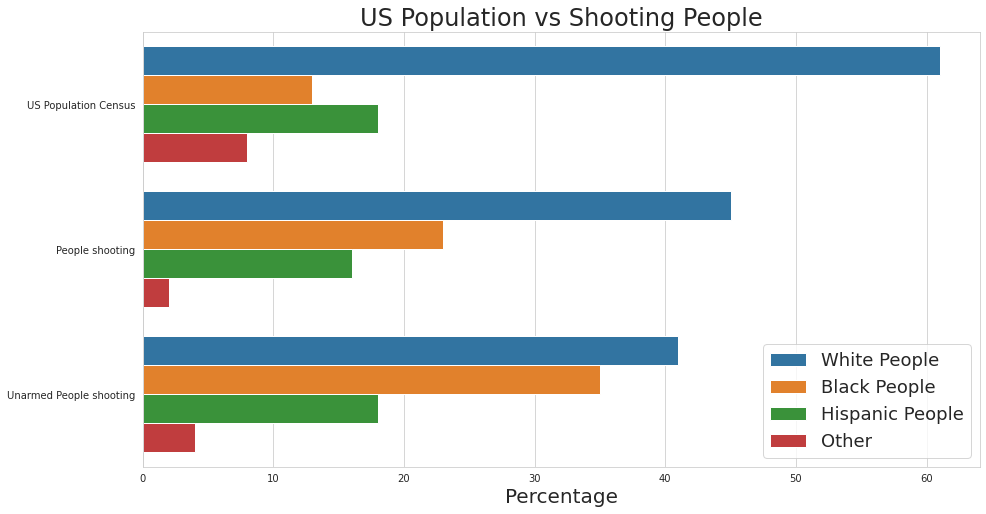

In [ ]:
White = 61
Black = 13
Hispanic = 18
Other = 5.9 + 1.5 + 0.6

# Asian	1.69
# 5	Native American	1.40
# 6	Other	0.86

White_Shoot = int(total_race_percent_df.query('race == "White"').total_percent)
Black_Shoot = int(total_race_percent_df.query('race == "Black"').total_percent)
Hispanic_Shoot = int(total_race_percent_df.query('race == "Hispanic"').total_percent)

Other_S1 = total_race_percent_df.query('race == "Asian"').total_percent
Other_S2 = total_race_percent_df.query('race == "Native American"').total_percent
Other_S3 = total_race_percent_df.query('race == "Other"').total_percent
Other_S = int(Other_S1) + int(Other_S2) + int(Other_S3)


total_race_percent_unarmed = round(Fatal_police.query('armed == "unarmed"')['race'].value_counts(normalize=True) * 100)
# total_race_percent_unarmed.rename(index = race, inplace = True)

White_Shoot_Unarmed = int(total_race_percent_unarmed.W)
Black_Shoot_Unarmed = int(total_race_percent_unarmed.B)
Hispanic_Shoot_Unarmed = int(total_race_percent_unarmed.H)

Other_U1 = total_race_percent_unarmed.A
Other_U2 = total_race_percent_unarmed.N
Other_U3 = total_race_percent_unarmed.O
Other_U = int(Other_U1) + int(Other_U2) + int(Other_U3)

df = pd.DataFrame(data = {'race': ["White People","White People","White People","Black People","Black People","Black People","Hispanic People","Hispanic People","Hispanic People","Other","Other","Other"],
                          'percentual': [White,White_Shoot,White_Shoot_Unarmed,Black,Black_Shoot,Black_Shoot_Unarmed,Hispanic,Hispanic_Shoot,Hispanic_Shoot_Unarmed,Other,Other_S,Other_U],
                          'type_percentual': ["US Population Census","People shooting","Unarmed People shooting","US Population Census","People shooting","Unarmed People shooting","US Population Census","People shooting","Unarmed People shooting","US Population Census","People shooting","Unarmed People shooting"]})

plt.figure(figsize=(15,8))
fig = sns.barplot(x='percentual',y='type_percentual',data=df, hue="race", orient='h')
fig.set_title('US Population vs Shooting People', fontsize=24)    
fig.legend(title='',fontsize=18)
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('')

plt.show()


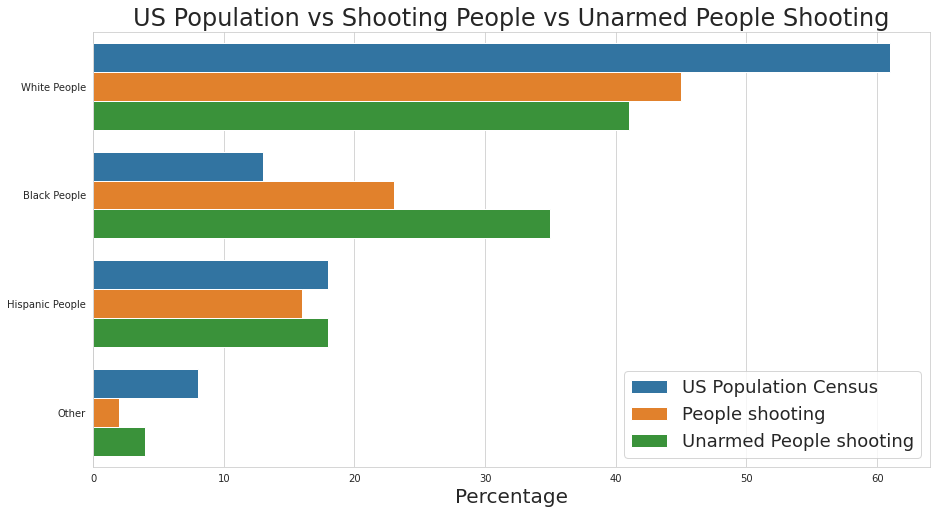

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x='percentual',y='race',data=df, hue="type_percentual", orient='h')

fig.set_title('US Population vs Shooting People vs Unarmed People Shooting', fontsize=24)    
fig.legend(title='',fontsize=18)
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('')

plt.show()

In [ ]:
armed_number = Fatal_police['armed'].value_counts()

armed_number_df = pd.DataFrame(armed_number)
armed_number_df.reset_index(level=0, inplace=True)

armed_number_df.columns = ["armed", "total_number"] 
armed_number_df.head()

,armed,total_number
0,gun,3157
1,knife,823
2,unarmed,356
3,toy weapon,193
4,undetermined,169


The guns that people killed by the police were carrying.

The vast majority of people killed by the police were armed. Approximately 6 in 10 people killed by police had a gun. 

Many other people did not carry any weapons and were shot and killed, about 350 people. 

Nearly 200 other people were carrying toy guns when they were killed.


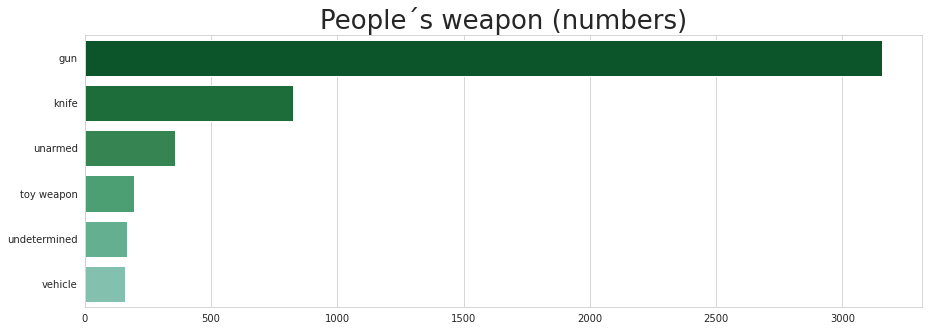

In [ ]:
armed_number_df_filter = armed_number_df.query('total_number > 150')

sns.set_style("whitegrid")
ax = sns.barplot(x=armed_number_df_filter.total_number, 
                 y=armed_number_df_filter.armed, 
                 data=armed_number_df_filter, 
                 orient='h',
                 palette=sns.color_palette("BuGn_r", n_colors=len(armed_number_df_filter) + 4))

ax.figure.set_size_inches(15, 5)    

ax.set_title('People´s weapon (numbers)', fontsize=26)    
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax

In [ ]:
per_state = Fatal_police['state'].value_counts()
per_state.rename(index = states_names, inplace = True)
per_state

California        825
Texas             494
Florida           368
Arizona           258
Colorado          204
Georgia           188
Oklahoma          170
North Carolina    162
Ohio              159
Washington        156
Tennessee         147
Missouri          145
Louisiana         113
Pennsylvania      111
New Mexico        108
Illinois          105
Alabama           104
New York          102
Nevada            102
Indiana            99
Kentucky           98
Virginia           96
Wisconsin          95
South Carolina     91
Oregon             87
Arkansas           83
Michigan           82
Maryland           79
New Jersey         70
Utah               66
Mississippi        66
Minnesota          62
West Virginia      54
Kansas             50
Idaho              42
Alaska             40
Massachusetts      35
Montana            33
Iowa               32
Hawaii             30
Nebraska           25
Maine              22
Connecticut        21
South Dakota       17
Wyoming            14
Delaware  

In [ ]:
state_count = pd.DataFrame(per_state)
state_count.reset_index(level=0, inplace=True)

state_count.columns = ["state", "deaths_total"] 

state_count.head()


,state,deaths_total
0,California,825
1,Texas,494
2,Florida,368
3,Arizona,258
4,Colorado,204



The 4 most violent states in US

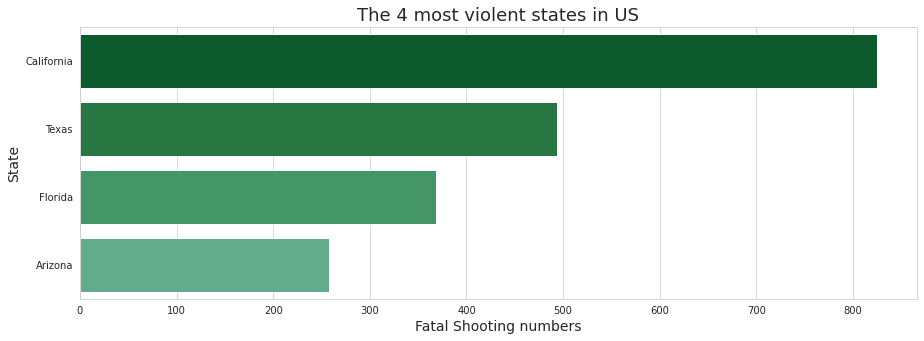

In [ ]:
state_count_graf = state_count.query('deaths_total > 250')
sns.set_style("whitegrid")
ax = sns.barplot(x=state_count_graf.deaths_total, 
                 y=state_count_graf.state, 
                 data=state_count_graf, 
                 orient='h',
                 palette=sns.color_palette("BuGn_r", n_colors=len(state_count_graf) + 4))

ax.figure.set_size_inches(15, 5)    

ax.set_title('The 4 most violent states in US', fontsize=18)    

ax.set_xlabel('Fatal Shooting numbers', fontsize=14)   

ax.set_ylabel('State', fontsize=14)
ax

Fatal Shooting per race in California

In [ ]:
total_race_percent_CA = round(Fatal_police.query('state == "CA"')['race'].value_counts(normalize=True) * 100)
total_race_percent_CA.rename(index = race, inplace = True)

total_race_percent_CA

Hispanic           39.0
White              27.0
Black              15.0
Not Informed       14.0
Asian               4.0
Other               1.0
Native American     0.0
Name: race, dtype: float64

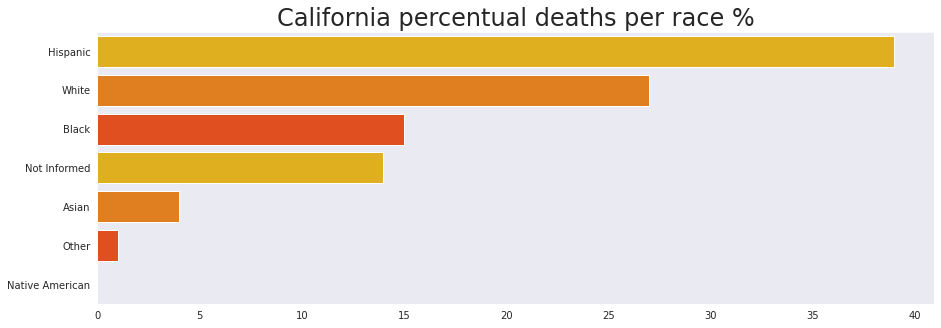

In [ ]:
total_race_percent_CA_df = pd.DataFrame(total_race_percent_CA)
total_race_percent_CA_df.reset_index(level=0, inplace=True)

total_race_percent_CA_df.columns = ["race", "deaths_total"] 

# total_race_percent_CA_df.head()

sns.set_style("dark")
ax = sns.barplot(x=total_race_percent_CA_df.deaths_total, 
                 y=total_race_percent_CA_df.race, 
                 data=total_race_percent_CA_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_CA_df) - 4))

ax.figure.set_size_inches(15, 5)    

ax.set_title('California percentual deaths per race %', fontsize=24)    
ax.set_ylabel('', fontsize=14)    
ax.set_xlabel('', fontsize=14)    


ax




In California more than doubles the number of blacks killed by the Police compared to the number of blacks representing the share of the black population in the state (which is 6% black).

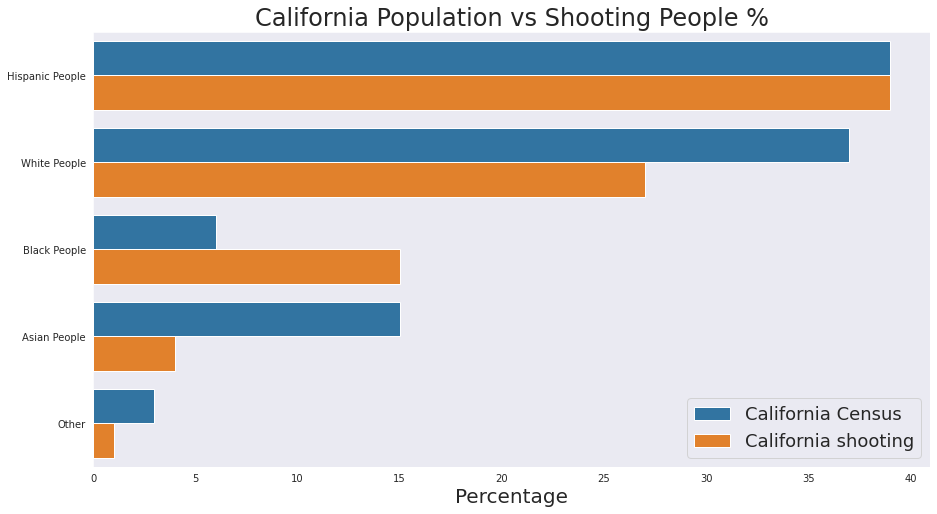

In [ ]:
# Califonria Census Reporter
# Source: https://censusreporter.org/profiles/04000US06-california/

White_C_CA = 37
Black_C_CA = 6
Hispanic_C_CA = 39
Asian_C_CA = 15
Other_C_CA = 3

df_CA = pd.DataFrame(data = {'race': ["Hispanic People","Hispanic People","White People","White People","Black People","Black People","Asian People",
                                   "Asian People","Other","Other"],
                          'percentual': [Hispanic_C_CA,total_race_percent_CA.Hispanic,White_C_CA,total_race_percent_CA.White,Black_C_CA,
                                         total_race_percent_CA.Black,Asian_C_CA,total_race_percent_CA.Asian,Other_C_CA,total_race_percent_CA.Other],
                          'type_percentual': ["California Census","California shooting","California Census","California shooting","California Census",
                                              "California shooting","California Census","California shooting","California Census","California shooting"]})


plt.figure(figsize=(15,8))
fig = sns.barplot(x='percentual',y='race',data=df_CA, hue="type_percentual", orient='h')

fig.set_title('California Population vs Shooting People', fontsize=24)    
fig.legend(title='',fontsize=18)
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('')

plt.show()

Fatal Shooting per race in Texas

In [ ]:
total_race_percent_TX = round(Fatal_police.query('state == "TX"')['race'].value_counts(normalize=True) * 100)
total_race_percent_TX.rename(index = race, inplace = True)

total_race_percent_TX

White              36.0
Hispanic           30.0
Black              20.0
Not Informed       12.0
Asian               1.0
Other               1.0
Native American     0.0
Name: race, dtype: float64

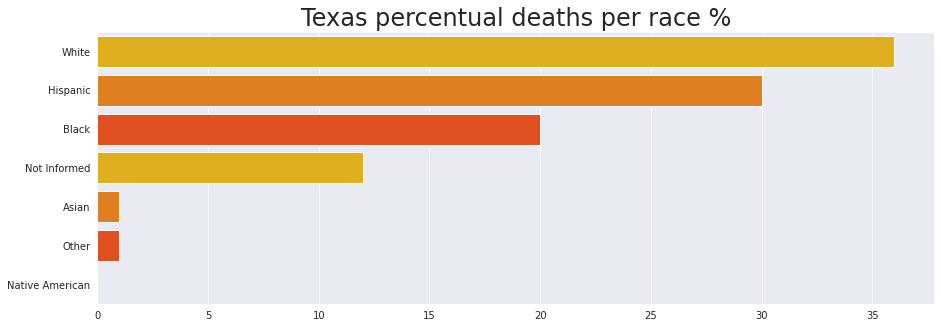

In [ ]:
total_race_percent_TX_df = pd.DataFrame(total_race_percent_TX)
total_race_percent_TX_df.reset_index(level=0, inplace=True)

total_race_percent_TX_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_TX_df.deaths_total, 
                 y=total_race_percent_TX_df.race, 
                 data=total_race_percent_TX_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_TX_df) - 4))

ax.figure.set_size_inches(15, 5)   

ax.set_title('Texas percentual deaths per race %', fontsize=24)    

ax.set_ylabel('', fontsize=14)    
ax.set_xlabel('', fontsize=14)    

ax

Fatal Shooting per race in Florida

In [ ]:
total_race_percent_FL = round(Fatal_police.query('state == "FL"')['race'].value_counts(normalize=True) * 100)
total_race_percent_FL.rename(index = race, inplace = True)

total_race_percent_FL

White           44.0
Black           31.0
Hispanic        14.0
Not Informed    10.0
Other            1.0
Asian            0.0
Name: race, dtype: float64

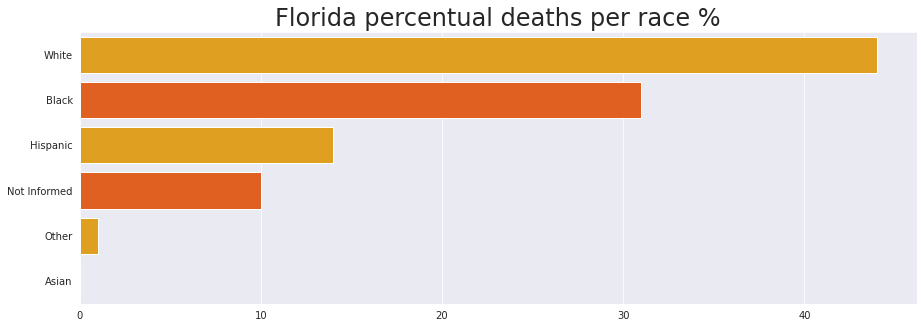

In [ ]:
total_race_percent_FL_df = pd.DataFrame(total_race_percent_FL)
total_race_percent_FL_df.reset_index(level=0, inplace=True)

total_race_percent_FL_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_FL_df.deaths_total, 
                 y=total_race_percent_FL_df.race, 
                 data=total_race_percent_FL_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_FL_df) - 4))

ax.figure.set_size_inches(15, 5)    

ax.set_title('Florida percentual deaths per race %', fontsize=24)    

ax.set_ylabel('', fontsize=14)   
ax.set_xlabel('', fontsize=14)    

ax

Fatal Shooting per race in Arizona

In [ ]:
total_race_percent_AZ = round(Fatal_police.query('state == "AZ"')['race'].value_counts(normalize=True) * 100)
total_race_percent_AZ.rename(index = race, inplace = True)

total_race_percent_AZ

White              42.0
Hispanic           33.0
Not Informed       14.0
Black               7.0
Native American     5.0
Name: race, dtype: float64

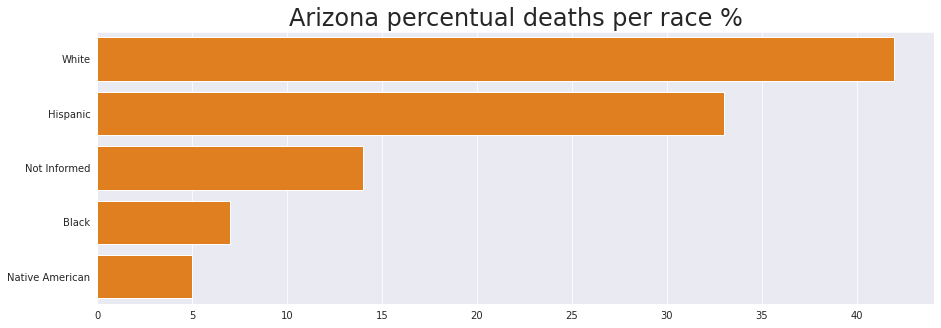

In [ ]:
total_race_percent_AZ_df = pd.DataFrame(total_race_percent_AZ)
total_race_percent_AZ_df.reset_index(level=0, inplace=True)

total_race_percent_AZ_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_AZ_df.deaths_total, 
                 y=total_race_percent_AZ_df.race, 
                 data=total_race_percent_AZ_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_AZ_df) - 4))

ax.figure.set_size_inches(15, 5)    
ax.set_title('Arizona percentual deaths per race %', fontsize=24)   
ax.set_ylabel('', fontsize=14)   
ax.set_xlabel('', fontsize=14)  

ax

In Arizona the number of blacks killed by the Police almost doubles compared to the share of the population considered black (which is 4% black). Detail for the number of Hispanics killed by the police that greater than the share they represent of the population of the state (which is 32% Hispanic)

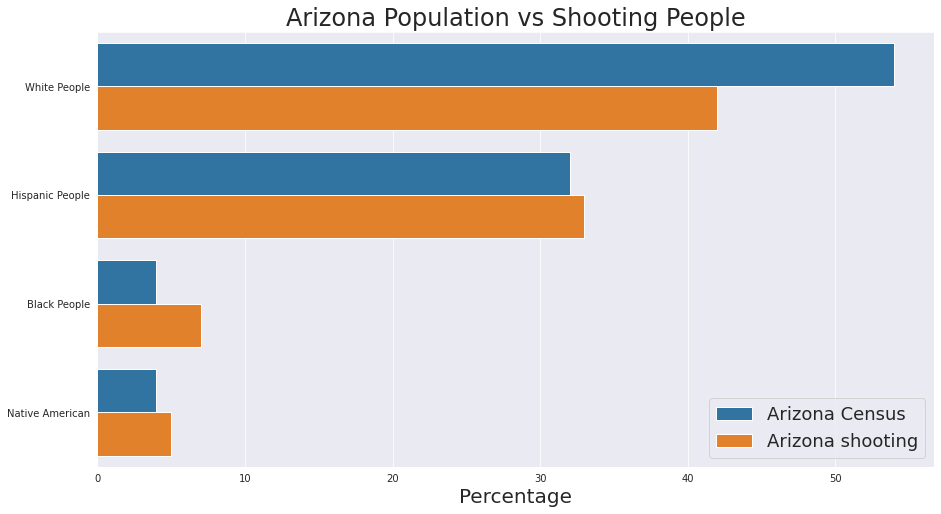

In [ ]:
# Arizona Census Reporter
# Source: https://censusreporter.org/profiles/04000US04-arizona/

White_C_AZ = 54
Black_C_AZ = 4
Hispanic_C_AZ = 32
Native_C_AZ = 4

native_american = total_race_percent_AZ_df.query('race == "Native American"').deaths_total

df_AZ = pd.DataFrame(data = {'race': ["White People","White People","Hispanic People","Hispanic People","Black People","Black People","Native American","Native American"],
                          'percentual': [White_C_AZ,total_race_percent_AZ.White,
                                         Hispanic_C_AZ,total_race_percent_AZ.Hispanic,
                                         Black_C_AZ,total_race_percent_AZ.Black,
                                         Native_C_AZ,native_american],
                          'type_percentual': ["Arizona Census","Arizona shooting","Arizona Census","Arizona shooting",
                                              "Arizona Census","Arizona shooting","Arizona Census","Arizona shooting",]})

plt.figure(figsize=(15,8))
fig = sns.barplot(x='percentual',y='race',data=df_AZ, hue="type_percentual", orient='h')

fig.set_title('Arizona Population vs Shooting People', fontsize=24)    
fig.legend(title='',fontsize=18)
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('')

plt.show()

The 4 most Fatal states per race

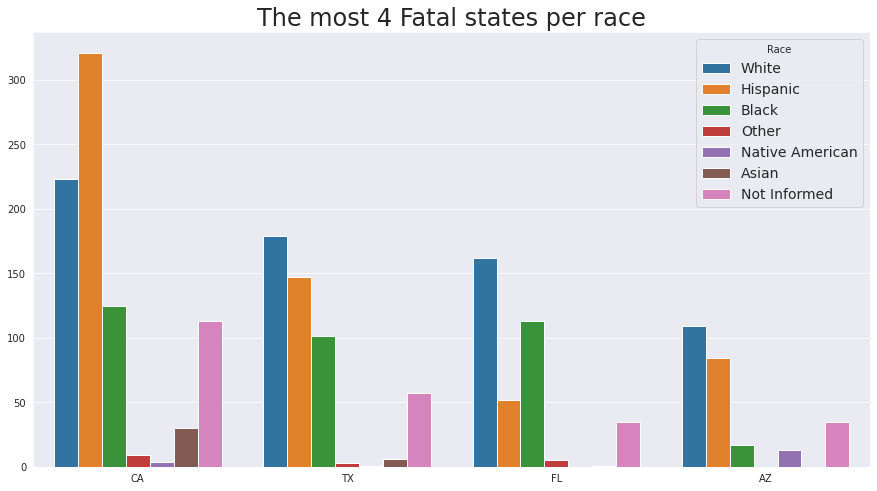

In [ ]:
df1 = Fatal_police.query('state in ["CA","TX","FL","AZ"]')

plt.figure(figsize=(15,8))

# with order of value_counts of the states
fig = sns.countplot(x='state',data=df1,hue='race', order = df1['state'].value_counts().index)

fig.set_title('The most 4 Fatal states per race', fontsize=24)    #

plt.legend(title='Race', labels=['White', 'Hispanic','Black', 'Other','Native American', 'Asian','Not Informed'], fontsize=14, loc='upper right')

plt.ylabel('')
plt.xlabel('')

# to save the image
# plt.savefig(os.path.join(IMG_PATH,'classificacao_acidentes.png'), format='png')

plt.show()


Number of shootings by gender

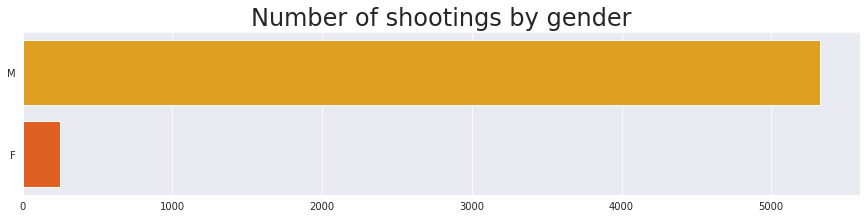

In [ ]:
sns.set_style("darkgrid")
ax = sns.barplot(x=df.gender_total, 
                 y=df.gender, 
                 data=df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_FL_df) - 4))

ax.figure.set_size_inches(15, 3)    

ax.set_title('Number of shootings by gender', fontsize=24)    

ax.set_ylabel('', fontsize=14)  
ax.set_xlabel('', fontsize=14)    

ax

The 4 most violent states in US - Rate per million

The largest cases of police killings occur in the states of California, Texas, Florida and Arizona. 


Below in the chart, the rate of deaths per million for each state is being shown. 


The state of Arizona is the state with the highest number of deaths per million, 35 per million, while California with 20, Texas and Florida at 17 per million.


*Estimated population numbers per each state in July 2019, source: https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population

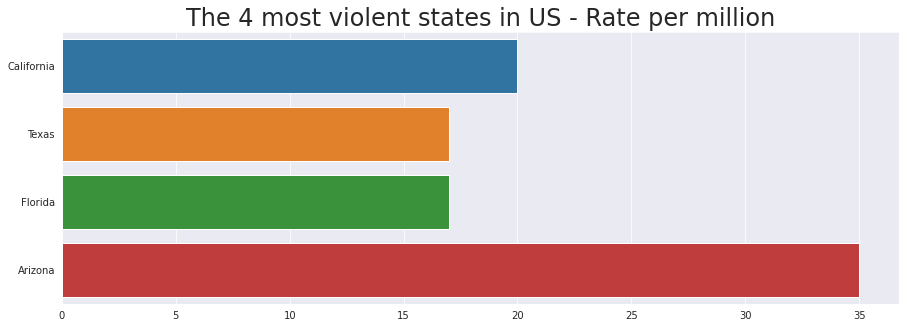

In [ ]:
# Estimated population July 2019, source: https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population
# Population Number
Ca = 39512223
Te = 28995881
Fl = 21477737
Ar = 7278717

Shoot_CA = Fatal_police.query('state == "CA"')['state'].value_counts()
Shoot_TX = Fatal_police.query('state == "TX"')['state'].value_counts()
Shoot_FL = Fatal_police.query('state == "FL"')['state'].value_counts()
Shoot_AZ = Fatal_police.query('state == "AZ"')['state'].value_counts()


M_CA = int((Shoot_CA/Ca) * 1000000)
M_TX = int((Shoot_TX/Te) * 1000000)
M_FL = int((Shoot_FL/Fl) * 1000000)
M_AZ = int((Shoot_AZ/Ar) * 1000000)


df = pd.DataFrame(data = {'state': ["California","Texas","Florida","Arizona"],
                          'per_million': [M_CA,M_TX,M_FL,M_AZ]})

sns.set_style("darkgrid")
ax = sns.barplot(x=df.per_million, 
                 y=df.state, 
                 data=df, 
                 orient='h')

ax.figure.set_size_inches(15, 5)    

ax.set_title('The 4 most violent states in US - Rate per million', fontsize=24)    

ax.set_ylabel('', fontsize=14)    
ax.set_xlabel('', fontsize=14)    

ax





Approaching the numbers in the state of Arizona, we can detect that although most of the population is white and hispanic (respectively 54% and 32%), the death rate of blacks per hundred thousand is almost 3 times higher than the death rate of whites, and almost twice the death rate of hispanics. While the death rate of natives per hundred thousand is twice the death rate of whites, and higher than the death rate of hispanics. In Arizona blacks account for 4% of the population, and natives also account for 4% of the population.

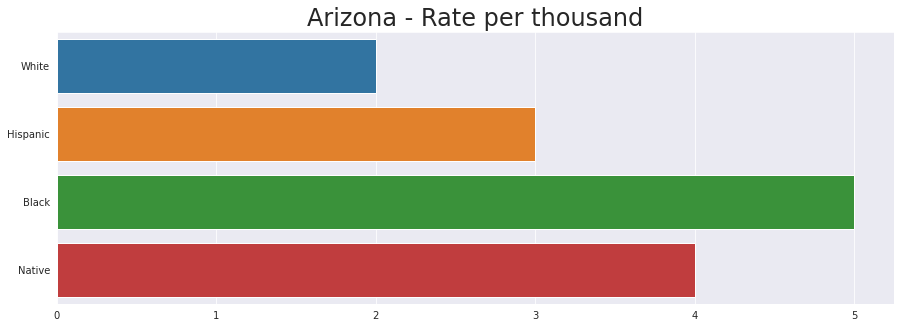

In [ ]:
# Estimated population July 2019, source: https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population

# Arizona Total population number
Ar = 7278717

# Population number per race in Arizona
w_az = (Ar * White_C_AZ)/100
b_az = (Ar * Black_C_AZ)/100
h_az = (Ar * Hispanic_C_AZ)/100
n_az = (Ar * Native_C_AZ)/100


race_per_thouAZ = Fatal_police.query('state == "AZ"')
race_per_thouAZ_2 = race_per_thouAZ['race'].value_counts()

M_WHITE = int((race_per_thouAZ_2.W/w_az) * 100000)
M_BLACK = int((race_per_thouAZ_2.B/b_az) * 100000)
M_HISPANIC = int((race_per_thouAZ_2.H/h_az) * 100000)
M_NATIVE = int((race_per_thouAZ_2.N/n_az) * 100000)


df_thousand = pd.DataFrame(data = {'race': ["White","Hispanic","Black","Native"],
                          'per_million': [M_WHITE,M_HISPANIC,M_BLACK,M_NATIVE]})

sns.set_style("darkgrid")
ax = sns.barplot(x=df_thousand.per_million, 
                 y=df_thousand.race, 
                 data=df_thousand, 
                 orient='h')

ax.figure.set_size_inches(15, 5)    

ax.set_title('Arizona - Rate per thousand', fontsize=24)   

ax.set_ylabel('', fontsize=14)    
ax.set_xlabel('', fontsize=14)   

ax


Approaching the state of California, we can detect that although most of the population is hispanic, white and asian (respectively 39%, 37% and 15%), the death rate of blacks per hundred thousand is 5 times higher than the death rate of whites, and almost 3 times the death rate of hispanics , and more than 5 times the death rate of asiatics. In California, blacks account for only 6% of the population.

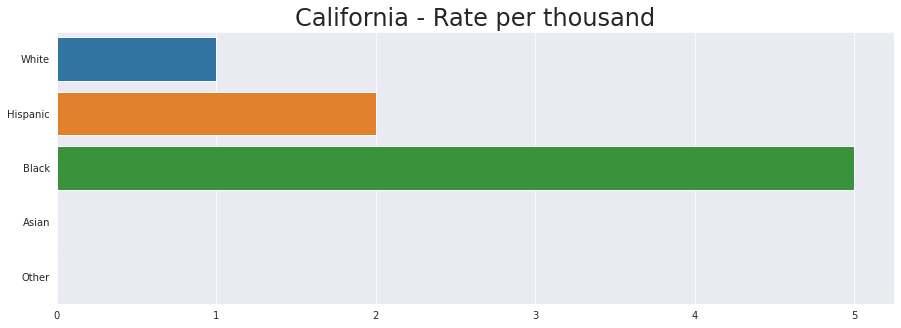

In [ ]:
# Estimated population July 2019, source: https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population

# California Total population number
Ca = 39512223

# White_C_CA = 37
# Black_C_CA = 6
# Hispanic_C_CA = 39
# Asian_C_CA = 15
# Other_C_CA = 3


# Population number per race in California
w_ca = (Ca * White_C_CA)/100
b_ca = (Ca * Black_C_CA)/100
h_ca = (Ca * Hispanic_C_CA)/100
a_ca = (Ca * Asian_C_CA)/100
o_ca = (Ca * Other_C_CA)/100


race_per_thouCA = Fatal_police.query('state == "CA"')
race_per_thouCA_2 = race_per_thouCA['race'].value_counts()

M_WHITE = int((race_per_thouCA_2.W/w_ca) * 100000)
M_BLACK = int((race_per_thouCA_2.B/b_ca) * 100000)
M_HISPANIC = int((race_per_thouCA_2.H/h_ca) * 100000)
M_ASIAN = int((race_per_thouCA_2.N/a_ca) * 100000)
M_OTHER = int((race_per_thouCA_2.N/o_ca) * 100000)



df_thousandCA = pd.DataFrame(data = {'race': ["White","Hispanic","Black","Asian","Other"],
                          'per_million': [M_WHITE,M_HISPANIC,M_BLACK,M_ASIAN,M_OTHER]})

sns.set_style("darkgrid")
ax = sns.barplot(x=df_thousandCA.per_million, 
                 y=df_thousandCA.race, 
                 data=df_thousandCA, 
                 orient='h')

ax.figure.set_size_inches(15, 5)   

ax.set_title('California - Rate per thousand', fontsize=24)    

ax.set_ylabel('', fontsize=14)    
ax.set_xlabel('', fontsize=14)   

ax